In [33]:
import models
from models import indicadores_frequencia, indicadores_tempo, get_raw_data, extrair_indicadores, filtro_passa_baixa
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

#Path
pasta = models.PATH_2ND_DATABASE
lista_arquivos = os.listdir(pasta)

# Setup de variáveis
rotacao_da_maquina = models.rotacao_hz
freq_passa_baixa = models.rotacao_hz*2
ordem_filtro = 5
rpm = models.rpm
frequencia_de_aquisicao = models.freq_sample
ordens_frequencia = 5

df_rolamentos = []
for rolamento in range(4):
    # Criando o Dataframe
    dataframe = []

    frequencia_de_referencia = models.fault_frequency

    for arquivo in lista_arquivos:
        sinal = get_raw_data.GetData(pasta,arquivo,rolamento).Get()

        Objeto_Extrair = extrair_indicadores.ExtrairIndicadores(sinal,frequencia_de_referencia,2,freq_passa_baixa,ordem_filtro)
        dataframe.append(Objeto_Extrair.Get(ordens_frequencia))

    dataframe = pd.json_normalize(dataframe)

    df_rolamentos.append(dataframe)

    # df_num = dataframe.select_dtypes(include=[np.number])

    # # Instanciando o Scaler
    # scaler = MinMaxScaler()

    # # Aplicando a normalização
    # df_scaled = scaler.fit_transform(df_num)

    # # Atualizando o DataFrame original
    # df_num = pd.DataFrame(df_scaled, columns=df_num.columns)

# print(dataframe)

# for defeito in models.features:
#     Filtro = filtro_passa_baixa.LowPassFilter(dataframe[defeito],cutoff=1000)
#     Filtro.plot_time_domain()
#     plt.plot(range(len(dataframe[defeito])),dataframe[defeito])
#     plt.title(defeito)
#     plt.show()


In [41]:
df_rolamentos[0]['soma_freq_outer_race']

0      11.180546
1      16.450035
2      12.262208
3      12.720221
4      13.508939
         ...    
979    14.141384
980    10.790440
981    13.675310
982     2.639166
983     2.669239
Name: soma_freq_outer_race, Length: 984, dtype: float64

In [37]:
from models import indicadores_referencia
percentual_primeiras_medidas = 0.1
freq_referencia = 10
no_ordens_frequencia = 1
largura_banda = 2
freq_passa_baixa = 1000
orden_filtro = 5


Teste = indicadores_referencia.IndicadoresReferencia(percentual_primeiras_medidas,
                                                    no_ordens_frequencia,
                                                    largura_banda,
                                                    freq_passa_baixa,
                                                    orden_filtro=5)

medias = Teste.extrair()
print(medias)

[[{'teste0_rolamento0': maximum                       0.362865
rms                           0.122042
skewness                      0.036661
kurtosis                      1.429888
potencia_freq_train         155.317247
soma_freq_train              16.318549
potencia_freq_inner_race     93.420367
soma_freq_inner_race         25.275484
potencia_freq_outer_race    107.148173
soma_freq_outer_race         27.141353
potencia_freq_roller        204.740468
soma_freq_roller             32.177064
dtype: float64}, {'teste0_rolamento1': maximum                       0.420837
rms                           0.135731
skewness                      0.043860
kurtosis                      0.994745
potencia_freq_train         143.042807
soma_freq_train              15.810464
potencia_freq_inner_race    114.178967
soma_freq_inner_race         27.086950
potencia_freq_outer_race    119.483447
soma_freq_outer_race         28.222440
potencia_freq_roller        194.699110
soma_freq_roller             31.497398
d

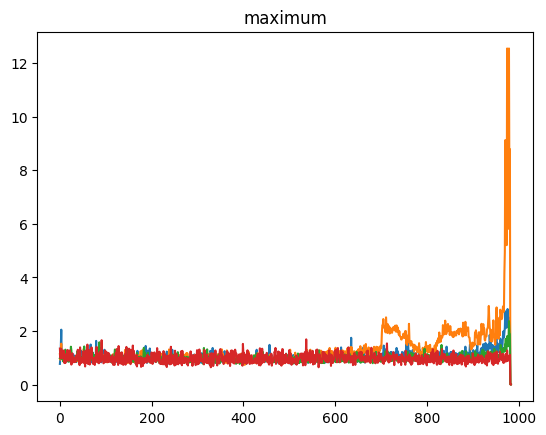

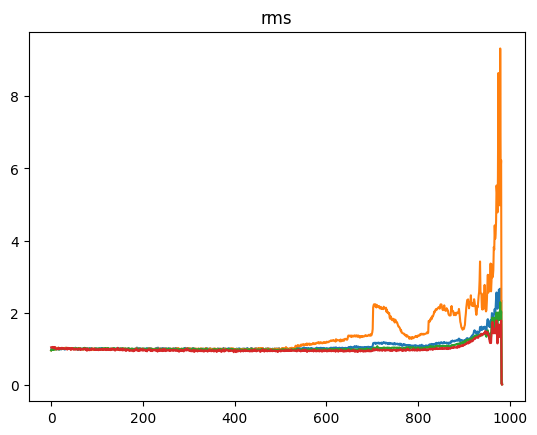

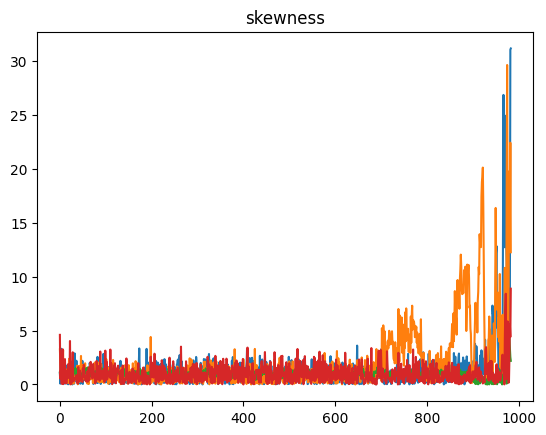

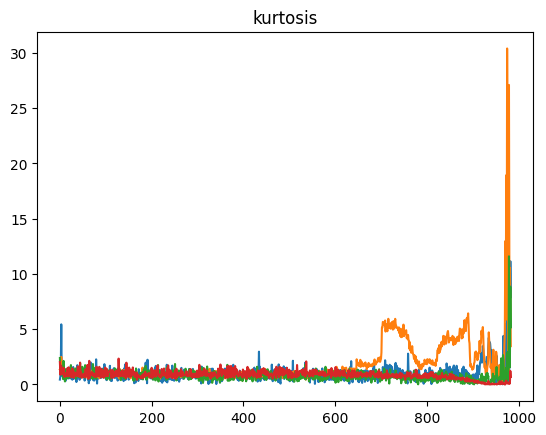

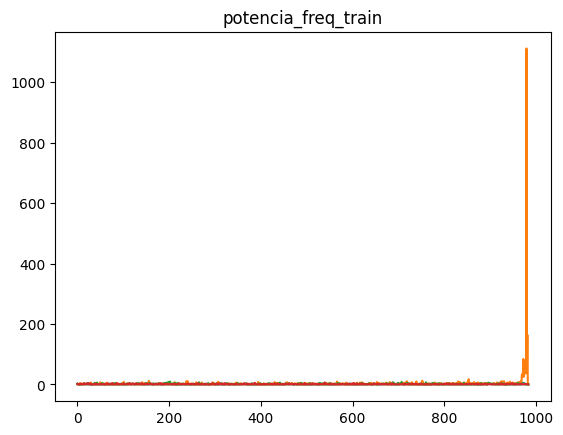

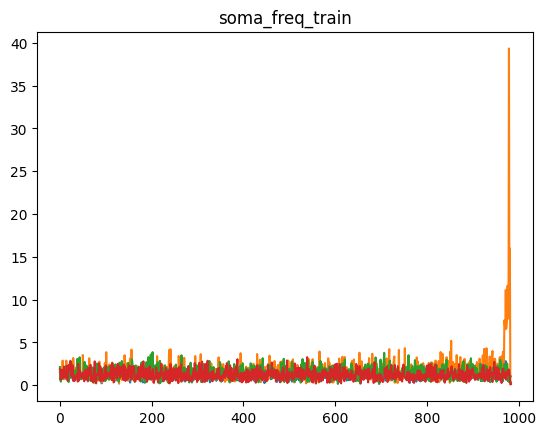

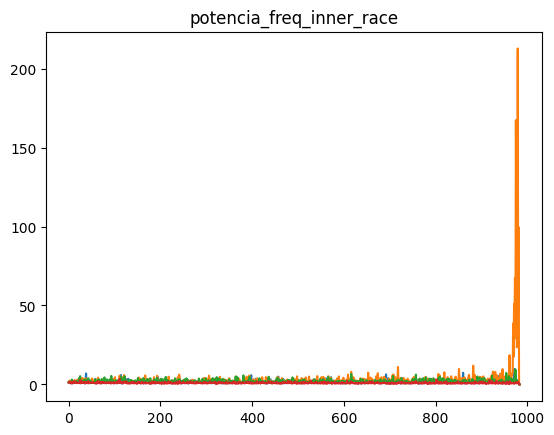

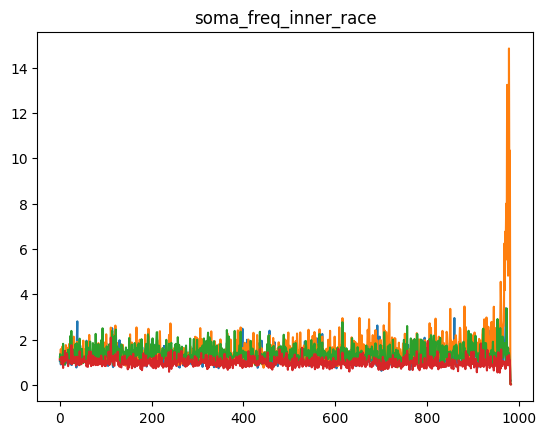

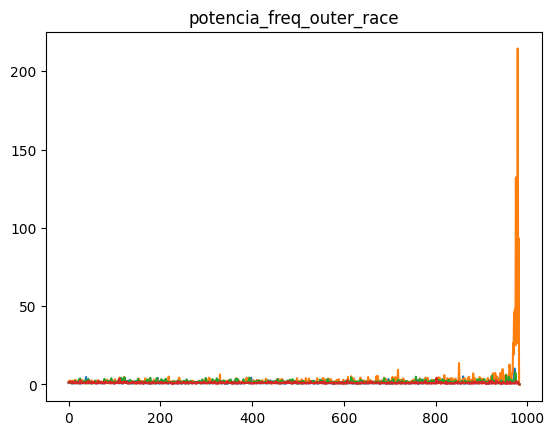

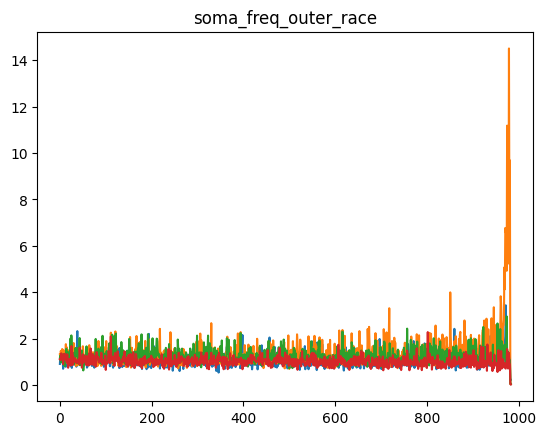

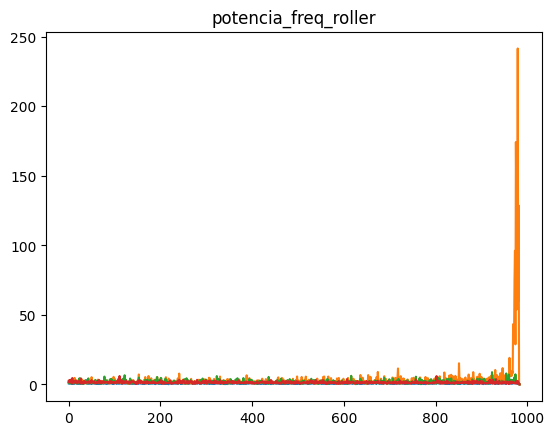

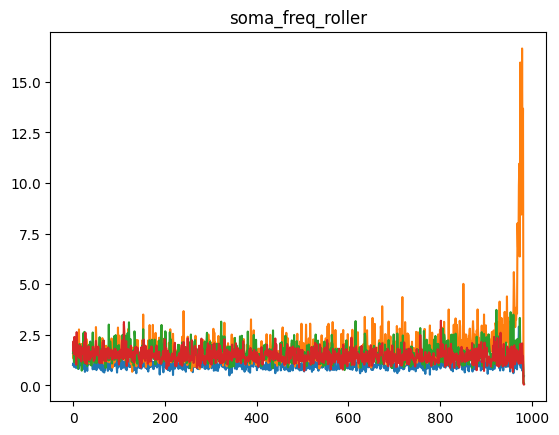

In [46]:
teste = 1
filtrar = False

for defeito in models.features:
    for rolamento in range(4):
        nome_teste = f'teste{teste}_rolamento{rolamento}'
        referencia = medias[teste][rolamento][nome_teste][defeito]
        df = df_rolamentos[rolamento][defeito]
        df = df/referencia

        if filtrar == True:
            Filtro = filtro_passa_baixa.LowPassFilter(df,cutoff=2000)
            df = Filtro.lowpass_filter()

        plt.plot(range(len(df)),df)
    plt.title(defeito)
    plt.show()